<a href="https://colab.research.google.com/github/anahita-m/ShopifyDataScienceChallenge/blob/main/Shopify_Fall2021_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# 1A.

First, let's quickly investigate the data and double check that the average order value is as reported.

In [2]:
import pandas as pd
import seaborn as sns

path_order_data = '/content/drive/My Drive/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'
orders_df = pd.read_csv(path_order_data)
orders_df.shape

(5000, 7)

In [3]:
orders_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
orders_df['order_amount'].mean()


3145.128

Okay, as we saw from our quick check, we have confirmation that the AOV (average order value) as calculated by mean is $3,145.13 which seems quite large for shoe orders. Let's investigate a bit further now.

In [5]:
orders_df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

When we describe the order_amount data we can see that the standard deviation is very large and that we have a max order amount of $704,000 which seems extreme to have come from an average customer, especially when seeing the median order value is significantly less. The massive difference between mean and median here as well as the very large standard deviation suggest that our mean may be getting skewed by some extreme outliers.



When we plot all the order values, we can see some there exist some extreme outliers in the data both in order amount and order total that corresponds to the max order amount value we saw earlier. We can also sort our table data in ascending order to see more clearly what our outliers are in exact numbers.

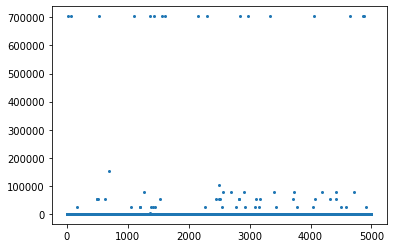

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=orders_df['order_id'], y=orders_df['order_amount'], s=4)
plt.show()

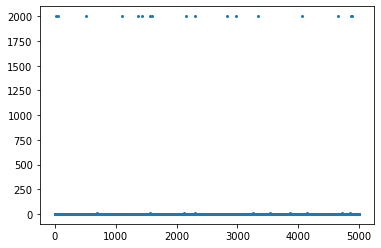

In [ ]:
plt.scatter(x=orders_df['order_id'], y=orders_df['total_items'], s=4)
plt.show()

When we take a look further, we see that all the orders that amount to $704,000 were purchased by the same user (user_id = 607) from the same shope (shop_id - 42) with the same number of total items. All the purchases also have been created at the the same exact time acaross multiple days. Based on this information, we can guess that this user is a bulk shopper whose possible intent may be to resell the items at a higher price. These outlier data points are not reflective of average customer orders so it is most likely that they are skewing our mean heavily.

In [20]:
orders_df.sort_values("order_amount",ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


# 1B.

I think a better statistic for AOVis the median order value as it is not as affected by outliers in the data set and thus provides a better description of what we are looking for. If I wanted to provide a mean statistic again, then I would remove the outliers first to calculate it. 

# 1C. 

The median order value is $284.00.

In [ ]:
orders_df['order_amount'].median()


284.0

#2A.


**54** orders were shipped by Speedy Express in total.


```
SELECT COUNT(*) AS numOrders
FROM Orders JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express'
```





#2B.

The last name of the employee with the most orders is **Peakcock**.


```
SELECT Employees.LastName, COUNT(*) AS numOrders
FROM Employees JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Employees.LastName
ORDER BY numOrders DESC
LIMIT 1;
```



#2C.

The product that was ordered the most by customers in Germany was **Boston Crab Meat**.

```
SELECT product.ProductName AS Product, SUM(Quantity) AS TotalQuantityOrdered
FROM Customers AS customer , Orders AS orders, Products AS product, OrderDetails AS order_details
WHERE customer.Country = "Germany" AND customer.CustomerID = orders.CustomerID AND order_details.OrderID = orders.OrderID AND order_details.ProductID = product.ProductID
GROUP BY product.ProductID
ORDER BY TotalQuantityOrdered DESC
LIMIT 1;
```

